###  Apply Logistical Regression to perform the predictions 


Problem Statement : A hospital has a patient health dataset, and they aim to use it for diabetes prediction. By analyzing patient attributes and historical health records, develop a model using logistic regression to identify individuals at risk of diabetes, enabling early intervention and personalized care for better health outcomes.

In [21]:
import pandas as pd    # importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("diabetes.csv")     # Loading the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.dropna(inplace = True)

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Outcome')

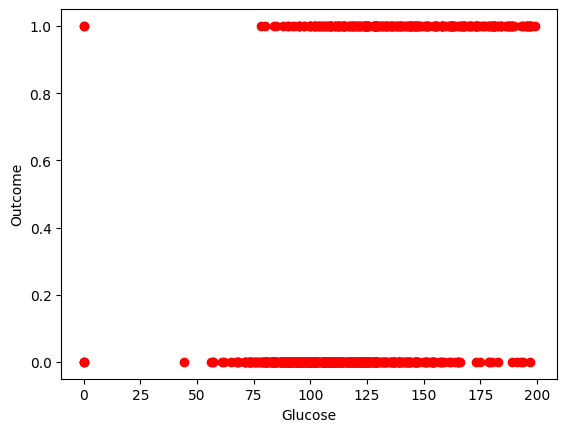

In [25]:
# plotting the values using scatter()
plt.scatter(df['Glucose'],df['Outcome'] , color='red')
plt.xlabel("Glucose")     
plt.ylabel("Outcome")

Text(0, 0.5, 'Outcome')

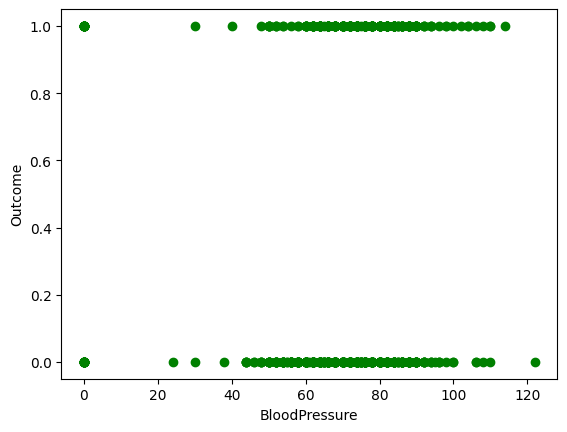

In [26]:
plt.scatter(df['BloodPressure'],df['Outcome'] , color='green')
plt.xlabel("BloodPressure")
plt.ylabel("Outcome")

Text(0, 0.5, 'Outcome')

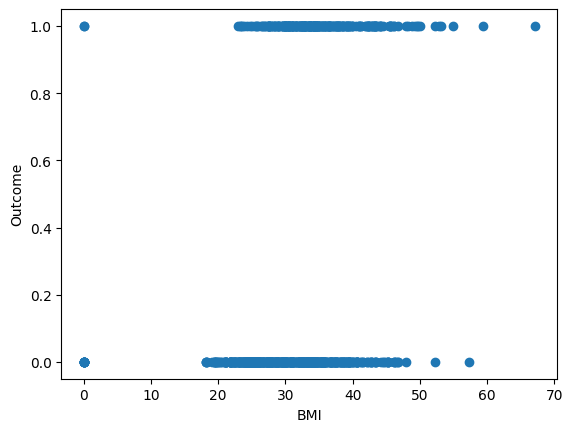

In [27]:
plt.scatter(df['BMI'],df['Outcome'] )
plt.xlabel("BMI")
plt.ylabel("Outcome")

In [28]:
x = df.loc[: , ['Glucose','BloodPressure','BMI']] # Extracting the independent attributes
x.head()

,Glucose,BloodPressure,BMI
0,148,72,33.6
1,85,66,26.6
2,183,64,23.3
3,89,66,28.1
4,137,40,43.1


In [29]:
y = df.iloc[: , [8]]      # Extracting the independent attributes
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [30]:
y = y.values.ravel()

In [31]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2)

In [32]:
# Normalizing data using Z score normalization

from sklearn.preprocessing import StandardScaler

St = StandardScaler()
x_train = St.fit_transform(x_train)
x_test = St.fit_transform(x_test)

In [33]:
x_train     #Similarly x_test is also normalized

array([[ 0.08464499,  0.34806603,  0.46564217],
       [-0.84114662, -0.96739943, -0.42042486],
       [-0.61767968, -0.15788222, -1.04805567],
       ...,
       [-0.93691816, -0.46145118, -1.06036215],
       [-0.20266964,  0.55044533, -0.13737567],
       [ 0.21234039,  0.95520394,  0.78561082]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
datamodel = LogisticRegression()
datamodel.fit(x_train , y_train)

LogisticRegression()

In [36]:
y_pred = datamodel.predict(x_test)

In [37]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test , y_pred)
cm

array([[81, 11],
       [31, 31]], dtype=int64)

In [39]:
accuracy=(cm[0][0]+cm[1][1])/np.sum(cm)
accuracy

0.7272727272727273

In [40]:
print("Accuracy of the model is : ",(accuracy*100),"%")

Accuracy of the model is :  72.72727272727273 %
